<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education - EA  Python Course Spring 2021

## Important  - Assignment Guidelines

1. Before you submit your assignment to GitHub, make sure to run the entire notebook with a fresh kernel. To do this first, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. Always replace the `raise NotImplementedError()` code with your code that addresses the activity challenge. If you don't replace that code, your notebook will not run.

```
# YOUR CODE HERE
raise NotImplementedError()
```

3. Any open ended questions will have a "YOUR ANSWER HERE" within a markdown cell. Replace that text with your answer also formatted using Markdown.
4. **DO NOT RENAME THIS NOTEBOOK File!** If the file name changes, the autograder will not grade your assignment properly.
6. When you create a figure, comment out `plt.show()` to ensure the autograder can grade your plots. For figure cells, DO NOT DELETE the code that says `DO NOT REMOVE LINE BELOW`.

```
### DO NOT REMOVE LINE BELOW ###
student_plot1_ax = nb.convert_axes(plt)
```

* Only include the package imports, code, and outputs that are required to run your homework assignment.
* Be sure that your code can be run on any operating system. This means that:
   1. the data should be downloaded in the notebook to ensure it's reproducible
   2. all paths should be created dynamically using the `os.path.join`

## Follow to PEP 8 Syntax Guidelines & Documentation

* Run the `autopep8` tool on all cells prior to submitting (HINT: hit shift + the tool to run it on all cells at once!
* Use clear and expressive names for variables. 
* Organize your code to support readability.
* Check for code line length
* Use comments and white space sparingly where it is needed
* Make sure all python imports are at the top of your notebook and follow PEP 8 order conventions
* Spell check your Notebook before submitting it.

For all of the plots below, be sure to do the following:

* Make sure each plot has a clear TITLE and, where appropriate, label the x and y axes. Be sure to include UNITS in your labels.


### Add Your Name Below 
**Your Name:** Mike Sutherland

<img style="float: left;" src="colored-bar.png"/>

---

# Week 04 and 05 Homework - Automate NDVI Workflow

For this assignment, you will write code to generate a plot of the mean normalized difference vegetation index (NDVI) for two different sites in the United States across one year of data:

* San Joaquin Experimental Range (SJER) in Southern California, United States
* Harvard Forest (HARV) in the Northeastern United States

The data that you will use for this week is available from **earthpy** using the following download: 

`et.data.get_data('ndvi-automation')`

## Assignment Goals

Your goal in this assignment is to create the most efficient and concise workflow that you can that allows for:

1. The code to scale if you added new sites or more time periods to the analysis.
2. Someone else to understand your workflow.
3. The LEAST and most efficient (i.e. runs fast, minimize repetition) amount of code that completes the task.

### HINTS

* Remove values outside of the landsat valid range of values as specified in the metadata, as needed.
* Keep any output files SEPARATE FROM input files. Outputs should be created in an outputs directory that is created in the code (if needed) and/or tested for.
* Use the functions that we demonstrated during class to make your workflow more efficient.
* BONUS - if you  chose - you can export your data as a csv file. You will get bonus points for doing this.


## Assignment Requirements

Your submission to the GitHub repository should include:
* This Jupyter Notebook file (.ipynb) with:
    * The code to create a plot of mean NDVI across a year for  2 NEON Field Sites:
        * NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object
    * The **data should be cleaned to remove the influence of clouds**. See the [earthdatascience website for an example of what your plot might look like with and without removal of clouds](https://www.earthdatascience.org/courses/earth-analytics-python/create-efficient-data-workflows/).
* BONUS: Create one output `.csv` file that has 3 columns - NDVI, Date and Site Name - with values for SJER and HARV.

Your notebook should:
* Have *at least* 2 well documented and well named functions with docstrings.
* Include a Markdown cell at the top of the notebook that outlines the overall workflow using pseudocode (i.e. plain language, not code)
* Include additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Replace this cell with your pseudocode  for this workflow

If you happen to be a diagram person a diagram is ok too



# Workflow pseudocode

1. Download Landsat/vector data
2. Iterate through each LANDSAT scene
    * Obtain date, location information
    * Iterate through red, NIR bands in each scene directory
        * convert to xarray 
        * remove "noise" outside valid/expected data range
        * crop to site boundary location
    * create NDVI
    * apply cloud mask to NDVI
    * query mean value
    * Aggregate date, location, ndvi infomation
    * Write to pre-established empty list
3. Convert list to pandas dataframe
4. Plot dataframe
5. Convert dataframe to csv, writing to disk

In [1]:
# Autograding imports - do not modify this cell
import matplotcheck.autograde as ag
import matplotcheck.notebook as nb
import matplotcheck.timeseries as ts
from datetime import datetime

In [2]:
# Import required site-packages/modules
import os
from glob import glob

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import geopandas as gpd
import numpy as np
from numpy import ma
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.plot as ep

# Adjust plotting style
sns.set_style('white')
sns.set(font_scale=1.35)

# Download data and set working directory
et.data.get_data('ndvi-automation')
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

In [3]:
# DO NOT MODIFY THIS CELL
# Tests that the working directory is set to earth-analytics/data

path = os.path.normpath(os.getcwd())
student_wd_parts = path.split(os.sep)

if student_wd_parts[-2:] == ['earth-analytics', 'data']:
    print("\u2705 Great - it looks like your working directory is set correctly to ~/earth-analytics/data")
else:
    print("\u274C Oops, the autograder will not run unless your working directory is set to earth-analytics/data")

✅ Great - it looks like your working directory is set correctly to ~/earth-analytics/data


# Figure 1: Plot 1 - Mean NDVI For Each Site Across the Year (50 points)

Create a plot of the mean normalized difference vegetation index (NDVI) for the two different sites in the United States across the year: 

* NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object.
* Each site should be identified with a different color in the plot and legend.
* The final plot **data should be cleaned to remove the influence of clouds**.
* Be sure to include appropriate title and axes labels.

Add additional cells as needed for processing data (e.g. defining functions, etc), but be sure to:
* follow the instructions in the code cells that have been provided to ensure that you are able to use the sanity check tests that are provided. 
* include only the plot code in the cell identified for the final plot code below

## Task 1: 

In the cell below, create a single dataframe containing MEAN NDVI, the site name, 
and the date of the data for the HARV site 
scene `HARV/landsat-crop/LC080130302017031701T1-SC20181023151837`.  The column names for the  final
DataFrame should be`mean_ndvi`, and `site`, and the data should be **indexed on the date**. 

Use the functions that we reviewed in class (or create your own versions of them) to implement your code

### In the Cell below Place  All Functions Needed to Run this Notebook (20 points)

In [4]:
### DO NOT REMOVE THIS LINE OR EDIT / MOVE THIS CELL ###
start_time = datetime.now()

In [5]:
# In this cell place all of the functions needed to run your notebook
# You will be graded here on function application, docstrings, efficiency so ensure
# All functions are placed here!

def fetch_site_date(inpath):
    """Retrieve site location identifier and acquisition date from
    a given path.

    Parameters
    -----------
    inpath : string
        A list containing two strings representing the site identifier
        and imagery acquisition date

    Returns
    -----------
    date_site : list
        a cropped and masked xarray object containing NDVI values
    """
    
    site_id = os.path.normpath(inpath).split(os.sep)[-3]
    date_id = os.path.basename(os.path.normpath(inpath))[10:18]
    date_site = [date_id, site_id]
    return date_site


def create_ndvi(rastpath, clip_shp, cloud_vals,
                valid_drange=None):
    """Iterate through a red, NIR bands in each directory and open as an
    xarray object, concurrently clipping the data in the process and
    constraining the values to a defined range of expected/valid values.
    With the xarray objects, calculate the NDVI then apply a cloud mask to
    eliminate bias in the pixel values. Finally, query and return the mean 
    NDVI value.

    Parameters
    ----------
    rastpath: string
        The defined path to the directory containing the spectral bands
        that will be used in NDVI calculation.
    clip_shp: geopandas GeoDataFrame
        The geopandas object representing the boundary used to clip/crop the
        imagery.
    cloud_vals: list
        A list of pixel values representing cloud cover visible in the
        imagery which will be used as a mask to remove these data from
        processing consideration.
    valid_drange: tuple
        The range of valid pixel values in the imagery, used to eliminate
        false/erroneous data (noise) from the imagery.
        
    Returns
    ------
    ndvi_mean: list
        A list containing the mean NDVI value; this will be combined with
        other data lists to create a final pandas dataframe.
    """
    
    clip_extent = clip_shp.geometry

    orig_bands = sorted(glob(os.path.join(rastpath, "*band*[4-5].tif")))
    proc_bands = []

    for aband in orig_bands:
        band = rxr.open_rasterio(aband,
                                 masked=True).rio.clip(clip_extent).squeeze()

        if valid_drange:
            mask = ((band < valid_drange[0]) | (band > valid_drange[1]))
            cleaned_band = band.where(~xr.where(mask, True, False))

        proc_bands.append(cleaned_band)

    ndvi_full = (proc_bands[1]-proc_bands[0]) / \
        (proc_bands[1]+proc_bands[0])

    # ndvi masking
    qa_path = glob(os.path.join(rastpath, "*qa.tif"))
    qa_layer = rxr.open_rasterio(qa_path[0],
                                 masked=True).rio.clip(clip_extent).squeeze()

    ndvi_masked = ndvi_full.where(~qa_layer.isin(cloud_vals))
    ndvi_mean = [np.nanmean(ndvi_masked)]
    
    return ndvi_mean


def list_to_df(inlist):
    """Convert a list containing site location identifiers, acquisition dates
    and mean NDVI values to a pandas dataframe .

    Parameters
    -----------
    inlist : list
        A list containing the site identifiers and imagery acquisition dates,
        as well as the mean NDVI values. 

    Returns
    -----------
    formatted_df : pandas dataframe
        A formatted datafrmae containing requisite column names and indexed
        by acqusition date.
    """
    
    formatted_df = pd.DataFrame(inlist, columns=["date", "site", "mean_ndvi"])
    formatted_df["date"] = pd.to_datetime(formatted_df["date"])
    formatted_df.set_index("date", inplace=True)
    return formatted_df

In [6]:
# Path definition to Landsat imagery and field site boundary data
root_dpath = os.path.join("ndvi-automation", "sites",
                          "HARV")
bands_dpath = os.path.join(root_dpath, "landsat-crop",
                           "LC080130302017031701T1-SC20181023151837")
crop_extent = gpd.read_file(os.path.join(root_dpath, "vector",
                                         str(os.path.basename(root_dpath)) +
                                         "-crop.shp"))

# Cloud no data vals for Landsat 8
vals = [328, 392, 840, 904, 1350, 352, 368, 416,
        432, 480, 864, 880, 928, 944, 992, 480, 992]

# Data range representing valid reflectance values to constrain Landsat data
valid_pixels = (0, 10000)

# Empty list creation; needed for subsequent processing steps
df_list = []

# Extract & combine acq date, location and NDVI information into a pandas df
loc_date = fetch_site_date(bands_dpath)
ndvi_calc = create_ndvi(bands_dpath, crop_extent, vals, valid_pixels)
df_list.append(loc_date + ndvi_calc)
final_df = list_to_df(df_list)
final_df

,site,mean_ndvi
date,,
2017-03-17,HARV,0.281132


In [7]:
# This cell  is testing your data output above

student_ndvi_ts_single_site = _

single_scene_points = 0

# Ensure the data is stored in a dataframe.
if isinstance(student_ndvi_ts_single_site, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    single_scene_points += 1
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Ensure that the date column is the index
if isinstance(student_ndvi_ts_single_site.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    single_scene_points += 2
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_ts_single_site.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    single_scene_points += 2
else:
    print('\u274C The data in your date column is not datetime.')

# Ensure the site name is correct
if student_ndvi_ts_single_site.site.values[0] == 'HARV':
    print('\u2705 You have the correct site name!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct site name.')

if np.allclose(0.281131628228094, student_ndvi_ts_single_site.mean_ndvi.values[0]):
    print('\u2705 You have the correct mean NDVI value!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct mean ndvi value.')

print("\n \u27A1 You received {} out of 15 points for creating a dataframe.".format(
    single_scene_points))
single_scene_points

✅ Your data is stored in a DataFrame!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
✅ You have the correct site name!
✅ You have the correct mean NDVI value!

 ➡ You received 15 out of 15 points for creating a dataframe.


15

## Task 1 Processing Explanation:

During "Task 1 Processing," I've extracted the site name & acquisition date from the string representation of the Landsat scene directory using basic string manipulation methods (indexing/slicing). The raster processing is sequential/methodical in the "create_ndvi" function, and although there is some duplication in terms of cropping the raster bands/qa layer individually (rather than simply cropping the final NDVI layer), I chose to use the guidance given in the examples provided in class -- cropping during the xarray creation step based on the evidence of quicker processing time. Overall, the code is fairly straightforward and "clean", efficient in the sense that all the "heavy lifting" is wrapped up in functions, and the structured in a way that will be easily implemented in iterative loops during subsequent Task 2 processing.  

## Task 2:

In the cell below, process all of the landsat scenes. Create a DataFrame that contains the following 
information for each scene


|   | index  | site  | mean_ndvi  | 
|---|---|---|---|
| Date  |   |   |   |
|  2017-01-07  | 0  | SJER  | .4  |  

Be sure to call your dataframe at the end of the cell to ensure autograding works.
HINT: FOR THIS STEP, leave any rows containing missing values (`NAN`).

In [8]:
# Path definition to the field site directory "level"
sites = sorted(glob(os.path.join("ndvi-automation", "sites", "*")))

# Empty list creation; needed for subsequent processing steps
ndvi_df_list = []

# Iterating through each site directory, processing each contained scene
for site in sites:
    crop_extent = gpd.read_file(os.path.join(site, "vector",
                                             str(os.path.basename(site)) +
                                             "-crop.shp"))
    dirs = sorted(glob(os.path.join(site, "landsat-crop", "*")))
    for dir in dirs:
        loc_date = fetch_site_date(dir)
        ndvi_calc = create_ndvi(dir, crop_extent, vals, valid_pixels)
        ndvi_df_list.append(loc_date + ndvi_calc)

# Final pandas df containing information for all Landsat scenes
final_df = list_to_df(ndvi_df_list)
final_df

<ipython-input-5-a5be35b87888>:83: RuntimeWarning: Mean of empty slice
  ndvi_mean = [np.nanmean(ndvi_masked)]
<ipython-input-5-a5be35b87888>:83: RuntimeWarning: Mean of empty slice
  ndvi_mean = [np.nanmean(ndvi_masked)]
<ipython-input-5-a5be35b87888>:83: RuntimeWarning: Mean of empty slice
  ndvi_mean = [np.nanmean(ndvi_masked)]
<ipython-input-5-a5be35b87888>:83: RuntimeWarning: Mean of empty slice
  ndvi_mean = [np.nanmean(ndvi_masked)]
<ipython-input-5-a5be35b87888>:83: RuntimeWarning: Mean of empty slice
  ndvi_mean = [np.nanmean(ndvi_masked)]
<ipython-input-5-a5be35b87888>:83: RuntimeWarning: Mean of empty slice
  ndvi_mean = [np.nanmean(ndvi_masked)]
<ipython-input-5-a5be35b87888>:83: RuntimeWarning: Mean of empty slice
  ndvi_mean = [np.nanmean(ndvi_masked)]
<ipython-input-5-a5be35b87888>:83: RuntimeWarning: Mean of empty slice
  ndvi_mean = [np.nanmean(ndvi_masked)]
<ipython-input-5-a5be35b87888>:83: RuntimeWarning: Mean of empty slice
  ndvi_mean = [np.nanmean(ndvi_masked)]
<

,site,mean_ndvi
date,,
2017-01-12,HARV,NaN
2017-01-28,HARV,NaN
2017-02-13,HARV,NaN
2017-03-01,HARV,NaN
2017-03-17,HARV,0.281132
2017-04-02,HARV,0.251133
2017-04-18,HARV,0.541080
2017-05-04,HARV,0.568924
2017-05-20,HARV,0.811310


In [9]:
# Last sanity check before creating your plot (10 points)

# Ensure that you call your dataframe at the bottom of the cell above
# and that it has columns called: mean_ndvi and site

# Ensure the data is stored in a dataframe.
student_ndvi_df = _

df_points = 0

if isinstance(student_ndvi_df, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    df_points += 2
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Check that dataframe contains the appropriate number of NAN values
if student_ndvi_df.mean_ndvi.isna().sum() == 15:
    print('\u2705 Correct number of masked data values!')
    df_points += 2
else:
    print('\u274C The amount of null data in your dataframe is incorrect.')


# Ensure that the date column is the index
if isinstance(student_ndvi_df.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    df_points += 3
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_df.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    df_points += 3
else:
    print('\u274C The data in your date column is not datetime.')

# Output for timer, # DO NOT MODIFY
end_time = datetime.now()
total_time = end_time - start_time
print(
    "Your total run time for processing the data was {0}.".format(total_time))

print("\n \u27A1 You received {} out of 10 points for creating a dataframe.".format(
    df_points))

df_points

✅ Your data is stored in a DataFrame!
✅ Correct number of masked data values!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
Your total run time for processing the data was 0:00:29.346553.

 ➡ You received 10 out of 10 points for creating a dataframe.


10

## Task 2 Processing Explanation

Task 2 builds upon the overall workflow defined during Task 1 processing, with the only difference being it is scaled to process multiple Landsat scenes. Although I wanted to try to avoid using nested loops, doing so enabled me to only open the cropping extent once during each "site level" iteration ("outer loop"), which is somewhat more efficient than what I initially planned to do - simply defining a list at containing all the scenes and iterating through it, which would have forced me to open the crop extent during every iteration.

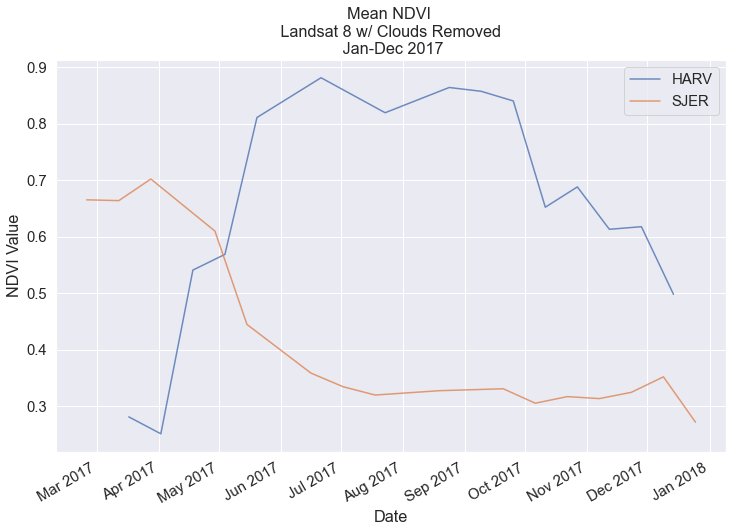

In [10]:
# Plotting initialization
f, ax = plt.subplots(figsize=(12, 8))

# Drop nan values in df in order to correctly "connect the dots" in the plot
final_df.dropna(inplace=True)

# Plotting the data according to each respective site location
for title, group in final_df.groupby("site"):
    group.groupby("site").plot(y="mean_ndvi",
                               label=title,
                               ax=ax,
                               alpha=.8)

# Added axes labels and title
ax.set(xlabel="Date",
       ylabel="NDVI Value",
       title="Mean NDVI \n Landsat 8 w/ Clouds Removed \n Jan-Dec 2017")

# Customization of the x-axis tick display
date_form = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

### DO NOT REMOVE LINES BELOW ###
final_masked_solution = nb.convert_axes(plt, which_axes="current")

In [11]:
# Ignore this cell for the autograding tests

In [12]:
# Ignore this cell for the autograding tests

# Question 1 (10 points)

Imagine that you are planning NEON’s upcoming flight season to capture remote sensing data in these locations and want to ensure that you fly the area when the vegetation is the most green.

When would you recommend the flights take place for each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

For the HARV field site, I'd suggest flying during the summer months (Jun-Sep) to capture "leaf-on" conditions. With the SJER site, late-winter/early-spring (Feb-May; wetter months) appear to be the most favorable for acquiring the "greenest" vegetation. The predominant control on vegetation "greenness" is likely temperature for the HARV site while for the SJER site it is precipitation.

# Question 2 (10 points)

How could you modify your workflow to look at vegetation changes over time in each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

Having a longer time series would be another way to look at the change through time. You could calculate the mean NDVI for each scene then aggregate by month/year/season. I'm not sure the code would change tremendously, although there might be another temporal directory level you'd need to loop through. That said, you could potentially bypass significant changes in that you could create a "master" pandas df containing all this information and perform the temporal grouping using pandas functionality (akin to what we did in the time-series and final lesson in the bootcamp during the fall....if memory serves me correct).

# Do not edit this cell! (10 points)

The notebook includes:
* additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Do not edit this cell! (20 points)

The notebook will also be checked for overall clean code requirements as specified at the **top** of this notebook. Some of these requirements include (review the top cells for more specifics): 

* Notebook begins at cell [1] and runs on any machine in its entirety.
* PEP 8 format is applied throughout (including lengths of comment and code lines).
* No additional code or imports in the notebook that is not needed for the workflow.
* Notebook is fully reproducible. This means:
   * reproducible paths using the os module.
   * data downloaded using code in the notebook.
   * all imports at top of notebook.

## BONUS - Export a  .CSV File to Share (10 points possible)

This is optional - if you export a **.csv** file with the columns specified above: Site, Date and NDVI Value you can get an additional 10 points.

* FULL CREDIT: File exists in csv format and contains the columns specified.
We will check your github repo for this file!


In [13]:
# Write pandas df to disk as a csv file
# Note this file represents the df with nan values removed
out_csv = final_df.to_csv(os.path.join("ndvi-automation",
                                       "outputs",
                                       "mean_ndvi.csv"))